In [9]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials
from array import array
import os
from PIL import Image
import sys
import time
from dotenv import load_dotenv
import matplotlib.pyplot as plt

load_dotenv()

subscription_key = "1d2545fc1fc44947869ee009a57ed0d2"
endpoint = "https://marchis-alex-l3.cognitiveservices.azure.com/"
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

def text_recognition(image_path):
    img = open(image_path, "rb")
    read_response = computervision_client.read_in_stream(
        image=img,
        mode="Printed",
        raw=True
    )

    operation_id = read_response.headers['Operation-Location'].split('/')[-1]
    while True:
        read_result = computervision_client.get_read_result(operation_id)
        if read_result.status not in ['notStarted', 'running']:
            break
        time.sleep(1)

    result = []
    result_frame = []
    if read_result.status == OperationStatusCodes.succeeded:
        for text_result in read_result.analyze_result.read_results:
            for line in text_result.lines:
                for word in line.words:
                    result.append(word.text)
                    result_frame.append([int(word.bounding_box[0]), int(word.bounding_box[1]), int(word.bounding_box[2]) ,int(word.bounding_box[3])])
    return result,result_frame

result, frames = text_recognition("test1.png")
    


In [1]:
def getResultFrame(imagePath):
    result_frame = [0,0,0,0]
    # img = open(imagePath, "rb")
    result = computervision_client.analyze_image_in_stream(img, visual_features=[VisualFeatureTypes.adult])
    for ob in result.objects:
        if ob.object_property == "word":
            result_frame.append([ob.rectangle.x, ob.rectangle.y, ob.rectangle.x + ob.rectangle.w, ob.rectangle.y + ob.rectangle.h])
    return result_frame

print(getResultFrame("test1.png"))

NameError: name 'computervision_client' is not defined

[0, 0, 0, 0]


In [33]:
def getCharactersIn(words):
    result = []
    for word in words:
        for chr in word:
            result.append(chr)
    return result
print(getCharactersIn(text_recognition("my_image.jpeg")))

['P', 'o', 's', 't', 'e', 'C', 'E', 'A', 'M', 'S', 'o', 'n', 's', 'E', 'M', 'a', 'i', 'm', 'a', 'r', 'i', 'd', 'o', 'c', 'à', 'S', 'c', 'r', 'i', 'u', 'm', 'a', 'i', 'm', 'u', 'l', 't', 'D', 'i', '-', 'm', 'o', 'i', 'c', 'o', 'l', 'o', 'r', 'a', 't']


In [41]:
# get/define the ground truth
# groundTruthWords = ["Google","Cloud", "Platform"]
# groundTruthCharacters = ['G','o','o','g','l','e','C','l','o','u','d','P','l','a','t','f','o','r','m']
# groundTruthWords = ["Succes" ,"in", "rezolvarea", "tEMELOR", "la", "LABORAtoarele", "de", "Inteligență", "Artificială!"]
# groundTruthCharacters = ['S', 'u', 'c', 'c', 'e', 's', 'i', 'n', 'r', 'e', 'z', 'o', 'l', 'v', 'a', 'r', 'e', 'a', 't', 
                        #  'E', 'M', 'E', 'L', 'O', 'R', 'l', 'a', 'L', 'A', 'B', 'O', 'R', 'A', 't', 'o', 'a', 'r', 'e', 
                        #  'l', 'e', 'd', 'e', 'I', 'n', 't', 'e', 'l', 'i', 'g', 'e', 'n', 'ț', 'ă', 'A', 'r', 't', 'i', 
                        #  'f', 'i', 'c', 'i', 'a', 'l', 'ă', '!']

groundTruthWords = ['Poate', 'că', 'AM', 'ȘansE', 'Mai', 'mari', 'dacă', 'Scriu', 'mai', 'mUlt', 'și', 'mai', 'colorat']
groundTruthCharacters = ['P', 'o', 'a', 't', 'e', 'c', 'ă', 'A', 'M', 'Ș', 'a', 'n', 's', 'E', 'M', 'a', 'i', 'm', 'a', 'r', 'i', 'd', 'a', 'c', 'ă', 'S', 'c', 'r', 'i', 'u', 'm', 'a', 'i', 'm', 'U', 'l', 't', 'ș', 'i', 'm', 'a', 'i', 'c', 'o', 'l', 'o', 'r', 'a', 't']


words = text_recognition("my_image.jpeg")
# words = text_recognition("test2.jpeg")
# words = text_recognition("test1.png")
characters = getCharactersIn(words)

In [42]:
#Functie care calculeaza distanta hamming
def dist_hamming(str1, str2):
    i=0
    count = 0
    lungime = len(str1)
    while(i<lungime):
        if(str1[i]!=str2[i]):
            count+=1
        i+=1
    return count

print("Distanta Hamming la nivel de cuvinte este: ", dist_hamming(groundTruthWords,words))
print("Distanta Hamming la nivel de caractere este: ", dist_hamming(groundTruthCharacters,characters ))


Distanta Hamming la nivel de cuvinte este:  10
Distanta Hamming la nivel de caractere este:  22


In [43]:
# Python3 implementation of above approach 
from math import floor

# Function to calculate the 
# Jaro Similarity of two strings 
def jaro_distance(s1, s2) :

	# If the strings are equal 
	if (s1 == s2) :
		return 1.0; 

	# Length of two strings 
	len1 = len(s1);
	len2 = len(s2); 

	if (len1 == 0 or len2 == 0) :
		return 0.0; 

	# Maximum distance upto which matching 
	# is allowed 
	max_dist = (max(len(s1), len(s2)) // 2 ) - 1; 

	# Count of matches 
	match = 0; 

	# Hash for matches 
	hash_s1 = [0] * len(s1) ;
	hash_s2 = [0] * len(s2) ; 

	# Traverse through the first string 
	for i in range(len1) : 

		# Check if there is any matches 
		for j in range( max(0, i - max_dist), 
					min(len2, i + max_dist + 1)) : 
			
			# If there is a match 
			if (s1[i] == s2[j] and hash_s2[j] == 0) : 
				hash_s1[i] = 1; 
				hash_s2[j] = 1; 
				match += 1; 
				break; 
		
	# If there is no match 
	if (match == 0) :
		return 0.0; 

	# Number of transpositions 
	t = 0; 

	point = 0; 

	# Count number of occurrences 
	# where two characters match but 
	# there is a third matched character 
	# in between the indices 
	for i in range(len1) : 
		if (hash_s1[i]) :

			# Find the next matched character 
			# in second string 
			while (hash_s2[point] == 0) :
				point += 1; 

			if (s1[i] != s2[point]) :
				point += 1;
				t += 1;
			else :
				point += 1;
				
		t /= 2; 

	# Return the Jaro Similarity 
	return ((match / len1 + match / len2 +
			(match - t) / match ) / 3.0); 

# Jaro Winkler Similarity 
def jaro_Winkler(s1, s2) : 

	jaro_dist = jaro_distance(s1, s2); 

	# If the jaro Similarity is above a threshold 
	if (jaro_dist > 0.7) :

		# Find the length of common prefix 
		prefix = 0; 

		for i in range(min(len(s1), len(s2))) :
		
			# If the characters match 
			if (s1[i] == s2[i]) :
				prefix += 1; 

			# Else break 
			else :
				break; 

		# Maximum of 4 characters are allowed in prefix 
		prefix = min(4, prefix); 

		# Calculate jaro winkler Similarity 
		jaro_dist += 0.1 * prefix * (1 - jaro_dist); 

	return jaro_dist; 

print("Jaro-Winkler Similarity for words =", jaro_Winkler(groundTruthWords, words)) ; 
print("Jaro-Winkler Similarity for characters=", jaro_Winkler(groundTruthCharacters, characters)) ; 

# This code is contributed by AnkitRai01


Jaro-Winkler Similarity for words = 0.4816849816849817
Jaro-Winkler Similarity for characters= 0.8532524617488396


In [44]:
def levenshteinFullMatrix(str1, str2):
	m = len(str1)
	n = len(str2)

	# Initialize a matrix to store the edit distances
	dp = [[0 for _ in range(n + 1)] for _ in range(m + 1)]

	# Initialize the first row and column with values from 0 to m and 0 to n respectively
	for i in range(m + 1):
		dp[i][0] = i
	for j in range(n + 1):
		dp[0][j] = j

	# Fill the matrix using dynamic programming to compute edit distances
	for i in range(1, m + 1):
		for j in range(1, n + 1):
			if str1[i - 1] == str2[j - 1]:
				# Characters match, no operation needed
				dp[i][j] = dp[i - 1][j - 1]
			else:
				# Characters don't match, choose minimum cost among insertion, deletion, or substitution
				dp[i][j] = 1 + min(dp[i][j - 1], dp[i - 1][j], dp[i - 1][j - 1])

	# Return the edit distance between the strings
	return dp[m][n]

# Driver code
str1 = "kitten"
str2 = "sitting"



print("Levenshtein Distance for words:", levenshteinFullMatrix(groundTruthWords, words))
print("Levenshtein Distance for characters:", levenshteinFullMatrix(groundTruthCharacters, characters))

Levenshtein Distance for words: 11
Levenshtein Distance for characters: 16


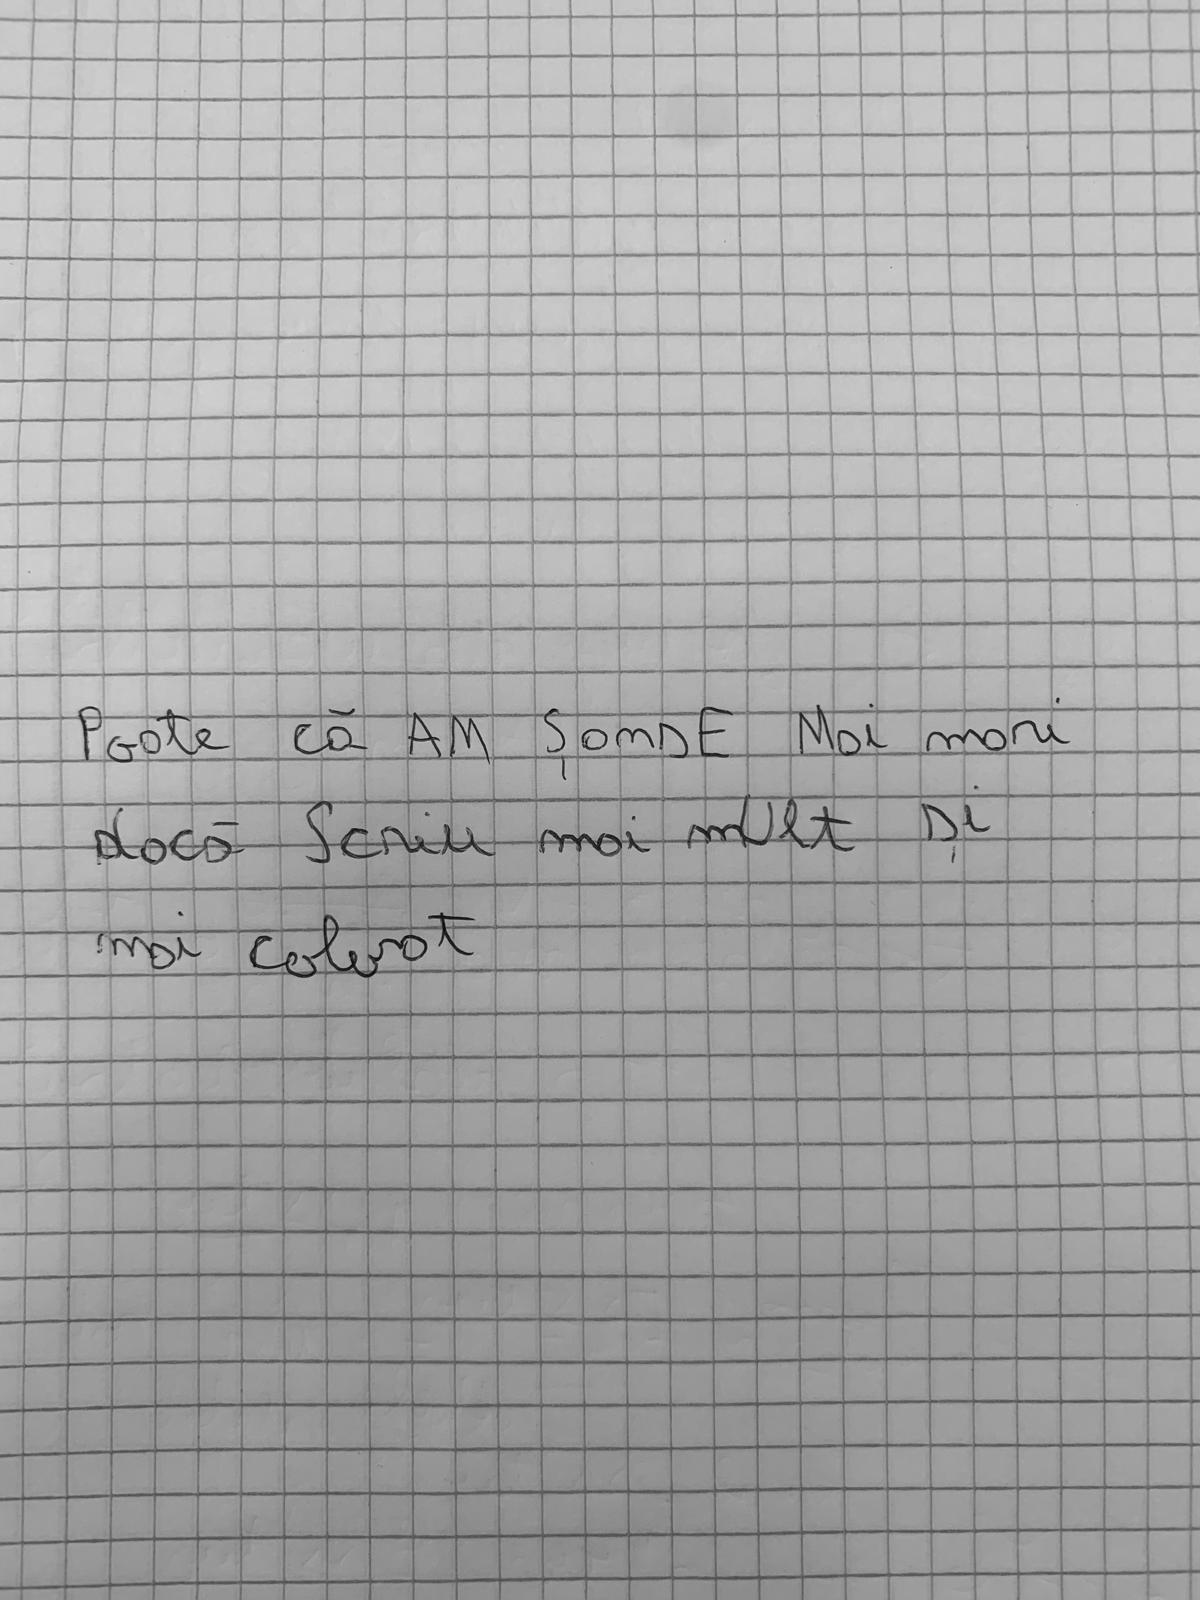

In [45]:
from PIL import ImageOps


with Image.open("my_image.jpeg") as im:
    gray_im = ImageOps.grayscale(im)
    gray_im.show()
    gray_im.save("gray_im3.jpeg")
   

In [46]:
gray_words = text_recognition("gray_im3.jpeg")
gray_characters = getCharactersIn(gray_words)
print("Distanta Hamming la nivel de cuvinte este: ", dist_hamming(groundTruthWords,gray_words))
print("Distanta Hamming la nivel de caractere este: ", dist_hamming(groundTruthCharacters,gray_characters),"\n")
print("Jaro-Winkler Similarity for words =", jaro_Winkler(groundTruthWords, gray_words)) ; 
print("Jaro-Winkler Similarity for characters=", jaro_Winkler(groundTruthCharacters, gray_characters),"\n") ; 
print("Levenshtein Distance for words:", levenshteinFullMatrix(groundTruthWords, gray_words))
print("Levenshtein Distance for characters:", levenshteinFullMatrix(groundTruthCharacters, gray_characters),"\n")

Distanta Hamming la nivel de cuvinte este:  10
Distanta Hamming la nivel de caractere este:  21 

Jaro-Winkler Similarity for words = 0.4816849816849817
Jaro-Winkler Similarity for characters= 0.8645038803805004 

Levenshtein Distance for words: 11
Levenshtein Distance for characters: 15 



In [55]:
import time
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from msrest.authentication import CognitiveServicesCredentials
import cv2

# Funcția pentru recunoașterea textului și încadrarea în chenare
def text_recognition(image_path):
    # Configurați clientul pentru Azure AI Vision
    computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))
    
    # Citirea imaginii
    with open(image_path, "rb") as image_stream:
        read_response = computervision_client.read_in_stream(
            image=image_stream,
            mode="Printed",
            raw=True
        )

    # Obținerea ID-ului operației
    operation_id = read_response.headers['Operation-Location'].split('/')[-1]
    
    # Așteptarea finalizării operației
    while True:
        read_result = computervision_client.get_read_result(operation_id)
        if read_result.status not in ['notStarted', 'running']:
            break
        time.sleep(1)

    # Lista pentru rezultatele textului
    result = []
    
    # Citirea imaginii pentru adăugarea chenarelor
    image = cv2.imread(image_path)
    
    # Verificarea dacă operația a avut succes
    if read_result.status == OperationStatusCodes.succeeded:
        for text_result in read_result.analyze_result.read_results:
            for line in text_result.lines:
                # Adăugarea textului în rezultat
                result.append(line.text)
                # Încadrarea textului într-un chenar
                bounding_box = [(int(line.bounding_box[0]), int(line.bounding_box[1])),
                                (int(line.bounding_box[4]), int(line.bounding_box[5]))]
                cv2.rectangle(image, bounding_box[0], bounding_box[1], (0, 255, 0), 2)
                # Adăugarea textului pe imagine
                cv2.putText(image, line.text, bounding_box[0], cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    
    # Returnarea rezultatelor textului și imaginei
    return result, image

# Apelarea funcției și afișarea rezultatelor
result, annotated_image = text_recognition("test2.jpeg")
print("Text recunoscut:", result)

# Afisarea imaginii cu chenarele și textul recunoscut
cv2.imshow("Annotated Image", annotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Text recunoscut: ['Lucces in resolvarea', 'TEMELOR la', 'LABORA toarele de', 'Inteligenta Artificialà!']


error: OpenCV(4.9.0) /io/opencv/modules/highgui/src/window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'
